In [23]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
import numpy as np
from qiskit.transpiler.basepasses import TransformationPass
from qiskit.transpiler import PassManager
from qiskit.converters import circuit_to_dag
from qiskit.transpiler import Layout, CouplingMap
from qiskit.transpiler.passes import TrivialLayout, OptimizeSwapBeforeMeasure
from weylchamber import c1c2c3

In [24]:
# define a mock topology and mock circuit
# line_topo = CouplingMap().from_grid(4,4)
# circ = QuantumCircuit(16)
# from qiskit.circuit.library import QuantumVolume
# circ = QuantumVolume(16, seed=42)

N = 4 # number of qubits
M = 2 # number of CXs

line_topo = CouplingMap().from_line(N)
# line_topo = CouplingMap().from_grid(2, 2)
circ = QuantumCircuit(N)

# # randomly generate CXs
for i in range(M):
    q1 = np.random.randint(N)
    q2 = np.random.randint(N)
    while q1 == q2:
        q2 = np.random.randint(N)
    circ.cx(q1, q2)

# transpile into CX basis
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller

pm = PassManager(Unroller(["u", "cx", "swap"]))
circ = pm.run(circ)
circ.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     ├───┤
q_2: ┤ X ├
     └─┬─┘
q_3: ──■──

In [25]:
c1 = QuantumCircuit(4)
c1.swap(0,1)
c1.cx(2,1)
c1.swap(1,2)
c1.swap(1,2)
c1.cx(1,0)
c1.swap(0,1)

In [26]:
c2 = QuantumCircuit(3)
# toffoli
c2.ccx(0,1,2)
c2.decompose().draw()

┌───┐      
q_0: ───────────────────■─────────────────────■────■───┤ T ├───■──
                        │             ┌───┐   │  ┌─┴─┐┌┴───┴┐┌─┴─┐
q_1: ───────■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ Tdg ├┤ X ├
     ┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐┌─┴─┐├───┤└┬───┬┘└───┘
q_2: ┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─┤ H ├──────
     └───┘└───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ └───┘

In [27]:
pm = PassManager(Unroller(["u", "cx", "swap"]))
circ = pm.run(c2)
circ.draw()

»
q_0: ────────────────────────────────────■────────────────────────────────────»
                                         │                      ┌────────────┐»
q_1: ────────────────■───────────────────┼──────────────────■───┤ U(0,0,π/4) ├»
     ┌────────────┐┌─┴─┐┌─────────────┐┌─┴─┐┌────────────┐┌─┴─┐┌┴────────────┤»
q_2: ┤ U(π/2,0,π) ├┤ X ├┤ U(0,0,-π/4) ├┤ X ├┤ U(0,0,π/4) ├┤ X ├┤ U(0,0,-π/4) ├»
     └────────────┘└───┘└─────────────┘└───┘└────────────┘└───┘└─────────────┘»
«                         ┌────────────┐     
«q_0: ──■────────■────────┤ U(0,0,π/4) ├──■──
«       │      ┌─┴─┐     ┌┴────────────┤┌─┴─┐
«q_1: ──┼──────┤ X ├─────┤ U(0,0,-π/4) ├┤ X ├
«     ┌─┴─┐┌───┴───┴────┐└┬────────────┤└───┘
«q_2: ┤ X ├┤ U(0,0,π/4) ├─┤ U(π/2,0,π) ├─────
«     └───┘└────────────┘ └────────────┘

15


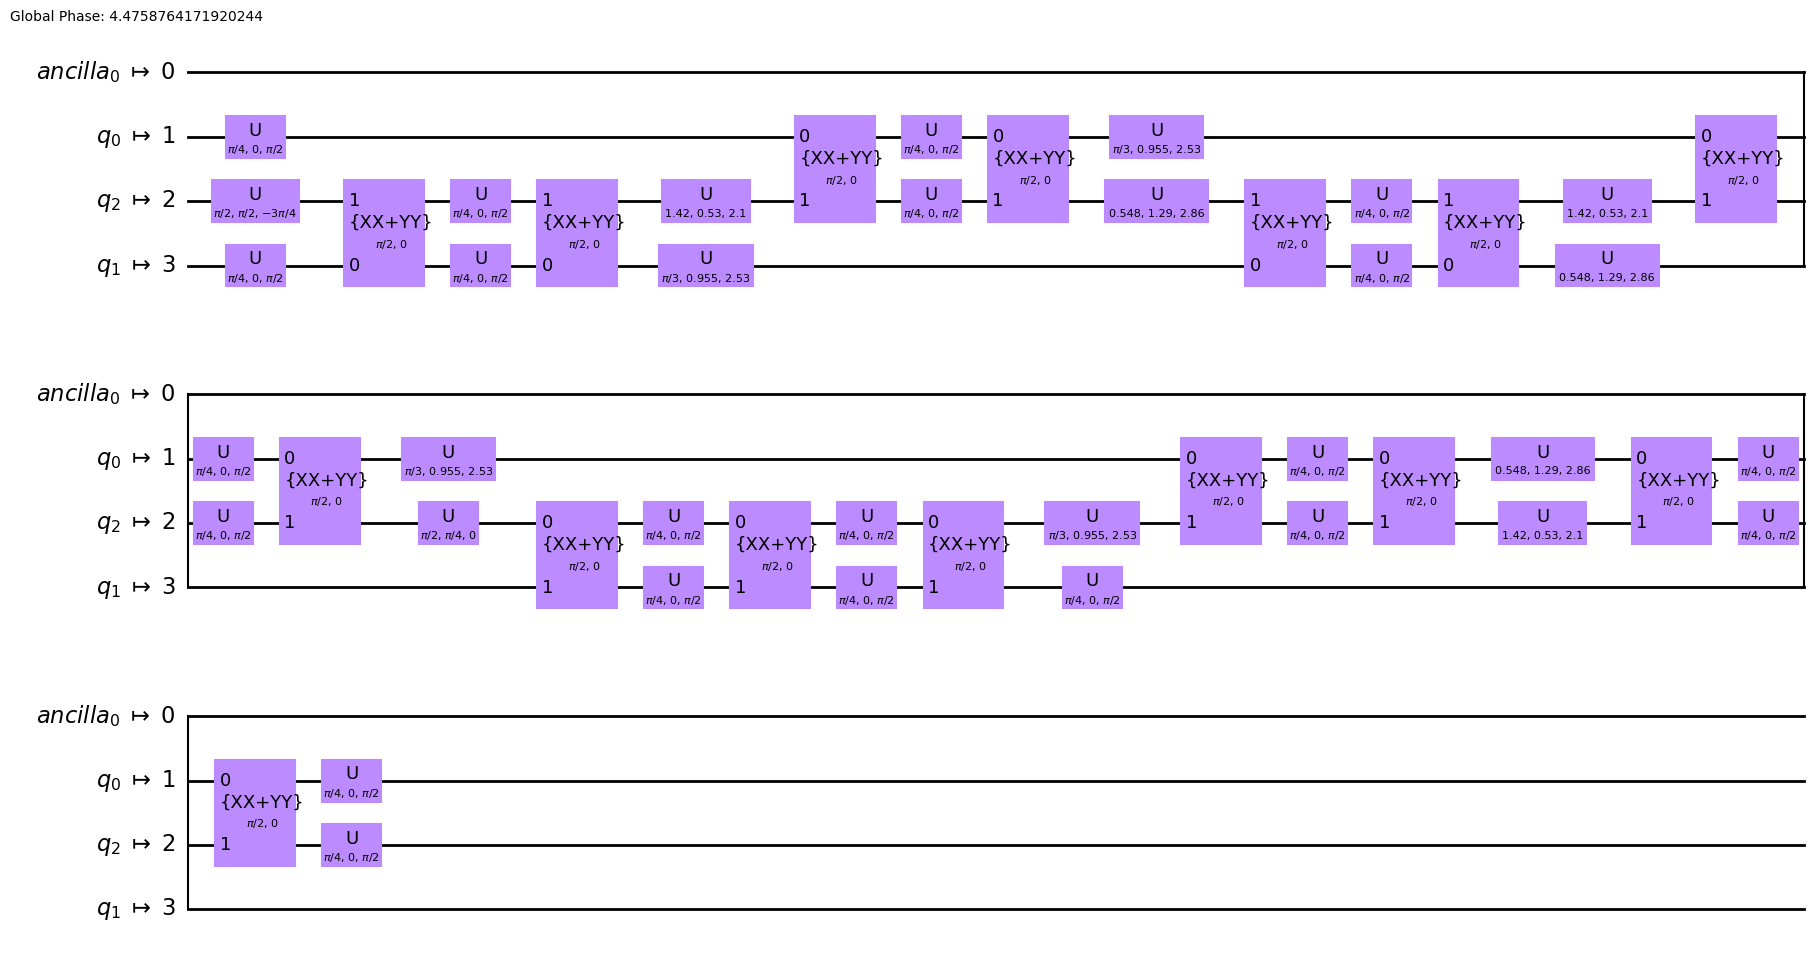

In [28]:
# from qiskit import BackendV2
from qiskit.providers import BackendV2
from qiskit.circuit.library import SwapGate
from qiskit import transpile

# Add any custom gates for the backend’s basis to the session EquivalenceLibrary instance.
from qiskit.circuit.equivalence_library import SessionEquivalenceLibrary as sel
from qiskit.circuit.library.standard_gates import CXGate, XXPlusYYGate

cx_decomp = QuantumCircuit(2)
cx_decomp.u(np.pi / 4, 0, np.pi / 2, 0)
cx_decomp.u(np.pi / 4, 0, np.pi / 2, 1)
cx_decomp.append(XXPlusYYGate(np.pi / 2, 0), [0, 1])
cx_decomp.u(np.pi / 4, 0, np.pi / 2, 0)
cx_decomp.u(np.pi / 4, 0, np.pi / 2, 1)
cx_decomp.append(XXPlusYYGate(np.pi / 2), [0, 1])
cx_decomp.u(np.pi / 4, 0, np.pi / 2, 0)
cx_decomp.u(np.pi / 4, 0, np.pi / 2, 1)
sel.add_equivalence(CXGate(), cx_decomp)

swap_decomp = QuantumCircuit(2)
swap_decomp.u(np.pi / 4, 0, np.pi / 2, 0)
swap_decomp.u(np.pi / 4, 0, np.pi / 2, 1)
swap_decomp.append(XXPlusYYGate(np.pi / 2, 0), [0, 1])
swap_decomp.u(np.pi / 4, 0, np.pi / 2, 0)
swap_decomp.u(np.pi / 4, 0, np.pi / 2, 1)
swap_decomp.append(XXPlusYYGate(np.pi / 2), [0, 1])
swap_decomp.u(np.pi / 4, 0, np.pi / 2, 0)
swap_decomp.u(np.pi / 4, 0, np.pi / 2, 1)
swap_decomp.append(XXPlusYYGate(np.pi / 2), [0, 1])
swap_decomp.u(np.pi / 4, 0, np.pi / 2, 0)
swap_decomp.u(np.pi / 4, 0, np.pi / 2, 1)
sel.add_equivalence(SwapGate(), swap_decomp)

bb = transpile(
    circ, basis_gates=["u", "xx_plus_yy"], coupling_map=line_topo, optimization_level=3
)
# count xx_plus_yy gates
print(bb.count_ops()['xx_plus_yy'])
bb.draw(output="mpl")

In [38]:
from qiskit.converters import circuit_to_dag, dag_to_circuit
from virtual_swap.vswap_pass import VirtualSwapAnnealing
from qiskit.transpiler.passes import FullAncillaAllocation, EnlargeWithAncilla, ApplyLayout
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import TrivialLayout

init_pass = PassManager([TrivialLayout(line_topo), ApplyLayout(), VirtualSwapAnnealing(line_topo)])
# dag = circuit_to_dag(circ)
newqc = init_pass.run(circ)

qc = dag_to_circuit(newqc)
qc.draw(output='mpl')

Initial cost: 12
(Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 2))
                                                                  »
q_0: ───────────────────────────────────────■─────────────────────»
                                          ┌─┴─┐┌────────────┐┌───┐»
q_1: ────────────────■──────────────────X─┤ X ├┤ U(0,0,π/4) ├┤ X ├»
     ┌────────────┐┌─┴─┐┌─────────────┐ │ └───┘└────────────┘└─┬─┘»
q_2: ┤ U(π/2,0,π) ├┤ X ├┤ U(0,0,-π/4) ├─X──────────────────────■──»
     └────────────┘└───┘└─────────────┘                           »
q_3: ─────────────────────────────────────────────────────────────»
                                                                  »
«                            ┌────────────┐ ┌────────────┐           
«q_0: ─────────────────■───X─┤ U(0,0,π/4) ├─┤ U(π/2,0,π) ├───────────
«     ┌─────────────┐┌─┴─┐ │ └────────────┘ ├────────────┤           
«q_1: ┤ U(0,0,-π/4) ├┤ X ├─X───────■────────┤ U(0,0,π/4) ├──■───X──X─
«     └┬────────────

NameError: name 'qubits' is not defined